## Dataset MNIST

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9912422/9912422 [00:00<00:00, 22312107.23it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 81081455.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31305666.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 645277.54it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



##Visualisasi Data MNIST

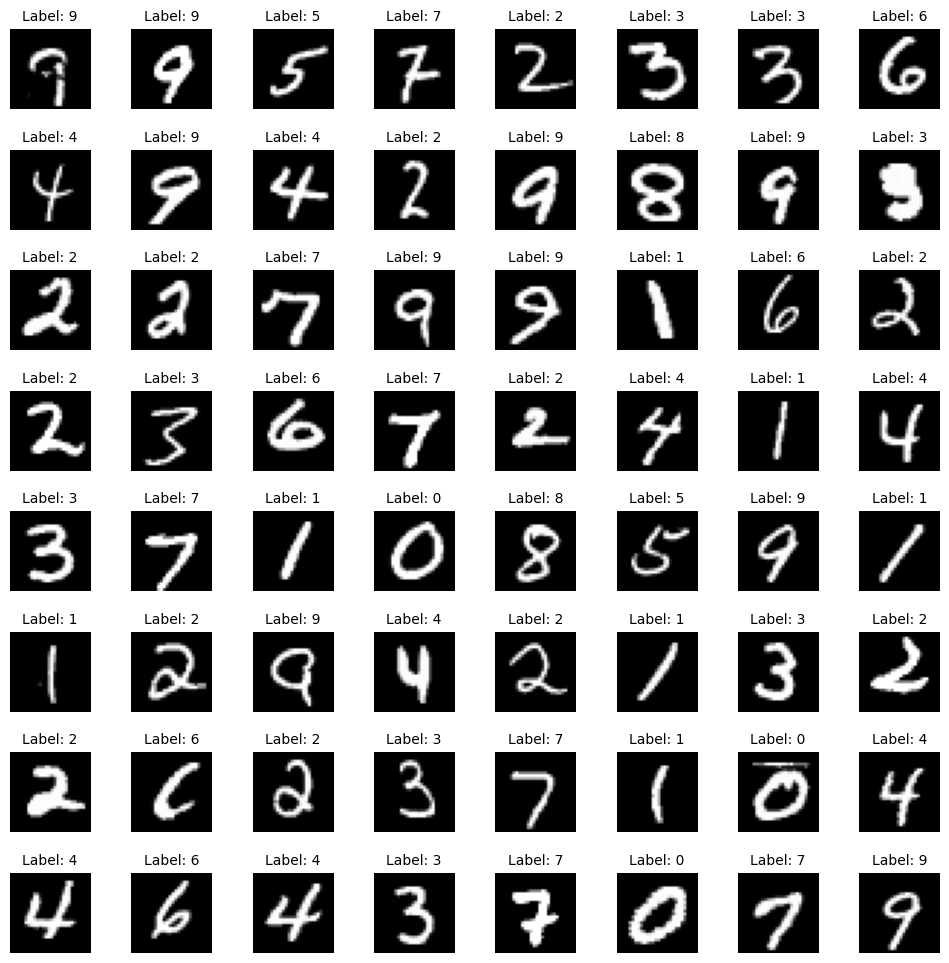

In [2]:
import matplotlib.pyplot as plt
import numpy as np

dataiter = iter(train_loader)
images, labels = next(dataiter)

fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i][0], cmap='gray')
    ax.set_title(f'Label: {labels[i].item()}', fontsize=10)
    ax.axis('off')  # Menghilangkan sumbu
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Jarak antar subplot
plt.show()

## Desain Model Neural Network:

In [3]:
import torch.nn as nn
import torch.nn.functional as F

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = NeuralNetwork()


## Pengaturan Hyperparameter:

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epoch = 47


## Looping untuk training model

In [5]:
for epoch in range(epoch):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')


Epoch 1, Loss: 0.39380828580304755
Epoch 2, Loss: 0.18513930567911566
Epoch 3, Loss: 0.1396020572684181
Epoch 4, Loss: 0.1125534287423515
Epoch 5, Loss: 0.0965343079492966
Epoch 6, Loss: 0.0834011382116541
Epoch 7, Loss: 0.07236966963406644
Epoch 8, Loss: 0.06483992739696738
Epoch 9, Loss: 0.06044939097584481
Epoch 10, Loss: 0.054607879471352525
Epoch 11, Loss: 0.04822543581157351
Epoch 12, Loss: 0.045592740947529097
Epoch 13, Loss: 0.04430009562305973
Epoch 14, Loss: 0.04057658127458669
Epoch 15, Loss: 0.037925860944554274
Epoch 16, Loss: 0.03420944915031986
Epoch 17, Loss: 0.03473158063984954
Epoch 18, Loss: 0.030282132649242365
Epoch 19, Loss: 0.030455535519087484
Epoch 20, Loss: 0.02760363026368638
Epoch 21, Loss: 0.02771037591948527
Epoch 22, Loss: 0.02583211805361302
Epoch 23, Loss: 0.02591097498531678
Epoch 24, Loss: 0.024305102895068598
Epoch 25, Loss: 0.02395661548875309
Epoch 26, Loss: 0.02072409464351965
Epoch 27, Loss: 0.02132516318506377
Epoch 28, Loss: 0.02078825683091089

## Evaluasi Model

In [7]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, accuracy_score

correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_preds.extend(predicted.tolist())
        all_labels.extend(labels.tolist())

accuracy = accuracy_score(all_labels, all_preds)
print('Akurasi: {:.2f}%'.format(accuracy * 100))
print("")

cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix: ")
print(cm)
print("")

classification_rep = classification_report(all_labels, all_preds)
print('Laporan Klasifikasi:')
print(classification_rep)

Akurasi: 97.29%

Confusion Matrix: 
[[ 970    0    1    0    2    1    4    1    1    0]
 [   0 1119    5    1    2    2    4    1    1    0]
 [   4    1 1003    6    2    2    2   10    2    0]
 [   0    1   11  972    3    5    0    9    5    4]
 [   0    0    3    0  966    0    5    1    0    7]
 [   3    0    0    6    1  866    6    3    4    3]
 [   5    2    4    0    5    1  940    0    1    0]
 [   0    3    9    1    2    1    0 1010    1    1]
 [   6    1    5    6    5    4    6    8  927    6]
 [   2    1    0    4   20    3    1   22    0  956]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.96      0.98      0.97       982
           5       0.98      0.97      0.97       892
           6       0.97      0.9

## Penjelasan Hasil

Hasil diatas, yang sudah diberikan menggambarkan hasil dari pelatihan model deep learning untuk mengklasifikasikan angka tulisan tangan dari dataset MNIST. Selama proses pelatihan, model melewati beberapa epoch, dengan nilai kerugian (loss) yang terus berkurang seiring berjalannya waktu, menunjukkan kemajuan yang signifikan dalam pembelajaran model. Hasil akhir menunjukkan tingkat akurasi model sekitar 97,29%.

Selain itu, matriks kebingungan (confusion matrix) dan laporan klasifikasi memberikan gambaran rinci tentang performa model untuk setiap kelas digit, mencakup metrik seperti presisi (precision), recall, dan nilai F1. Model ini menunjukkan kemampuan yang luar biasa dalam mengenali digit tulisan tangan, dengan tingkat akurasi yang tinggi dan performa yang konsisten untuk semua kelas digit. Hasil ini menegaskan bahwa model ini sangat efektif dalam tugas klasifikasi digit.